> Loading data... 
(2326, 19) (2326,) (258, 19) (258,)


c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RBF model Test MSE: 0.108
Polinomial model Test MSE: 0.108


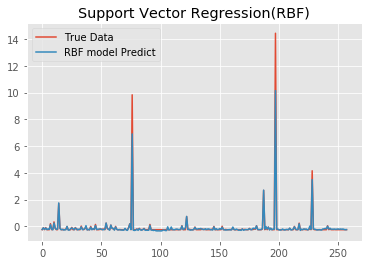

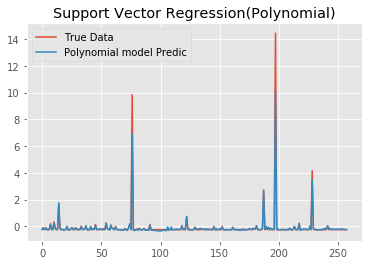

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 11 20:27:29 2018
@author: GY
"""
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
 
def data_pre(data):
    """
    :param data: 
    :param seq_len: 
    :return: 
    """
    row = round(0.9 * data.shape[0])
    data = data.values
    train = data[:int(row), :]
    x_train = train[:, :]
    y_train = train[:,16]
    x_test = data[int(row):, :]
    y_test = data[int(row):, 16]
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))
    return [x_train, y_train, x_test, y_test]

def predict_ts(X_train, y_train, X_test, y_test):

    svr_poly = svm.SVR(kernel='poly', C=1e2, degree=2)
    svr_rbf = svm.SVR(kernel='rbf', C=1e2, gamma=0.1)
    svr_poly.fit(X_train,y_train)
    svr_rbf.fit(X_train,y_train)
    p1 = svr_rbf.predict(X_test)
    p3 = svr_rbf.predict(X_test)
    
    error = mean_squared_error(y_test, p1)
    print('RBF model Test MSE: %.3f' % error)
    error2 = mean_squared_error(y_test, p3)
    print('Polinomial model Test MSE: %.3f' % error2)
    
    #y_test = y_test * 20450.83322 + 4975.270898
    #p1 = p1 * 20450.83322 + 4975.270898
    #p3 = p3 * 20450.83322 + 4975.270898
    
    plt.plot(y_test, label='True Data')
    plt.plot(p1, label='RBF model Predict')
    plt.title('Support Vector Regression(RBF)')
    plt.legend()
    plt.show()
    
    plt.plot(y_test, label='True Data')
    plt.plot(p3, label='Polynomial model Predic')
    plt.title('Support Vector Regression(Polynomial)')
    plt.legend()
    plt.show()
    
if __name__=="__main__":    
    print('> Loading data... ')
    df = pd.read_csv('data(1).csv', header=None)
    X_train, y_train, X_test, y_test = data_pre(df)
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    predict_ts(X_train, y_train, X_test, y_test)